In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth

import matplotlib.animation as animation
from matplotlib.colors import ListedColormap, BoundaryNorm
from IPython.display import HTML

In [187]:
data = pd.read_csv("SIRS_data.txt", sep=" ",header = None)

In [188]:
dt = np.array(data)

In [189]:
len(dt)

46

In [190]:
dt[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [191]:
np.zeros(19)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [192]:
len(dt[0])

901

In [193]:
list(range(0, 5))

[0, 1, 2, 3, 4]

In [194]:
def one_frame(a):
    N = int(mth.sqrt(len(a)-1))
    b = np.zeros((N, N),float)
    for i in range(0,N):
        for j in range(0,N):
            b[i][j] = a[N*i + j]
    return (b)

In [195]:
one_frame(dt[0])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

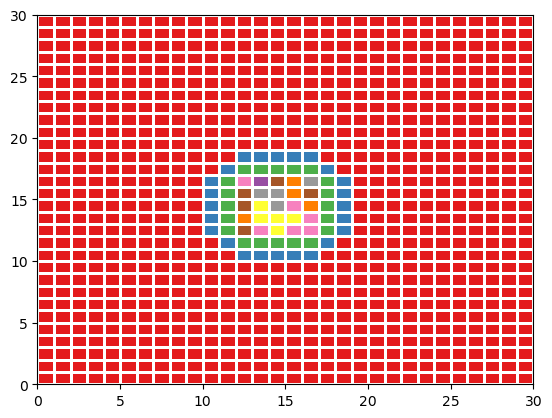

In [196]:
ax = plt.pcolormesh(one_frame(dt[2]), cmap='Set1',edgecolors='white')
plt.show()

In [197]:
print(one_frame(dt[0]).shape)

(30, 30)


MovieWriter Pillow unavailable; using Pillow instead.
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f9f6a212de0>
Traceback (most recent call last):
  File "/home/sudeep/miniconda3/lib/python3.12/weakref.py", line 60, in _cb
    callback(self)
  File "/home/sudeep/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py", line 248, in _remove_proxy
    del self.callbacks[signal][cid]
        ~~~~~~~~~~~~~~^^^^^^^^
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f9f6a210900>
Traceback (most recent call last):
  File "/home/sudeep/miniconda3/lib/python3.12/weakref.py", line 60, in _cb
    callback(self)
  File "/home/sudeep/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py", line 248, in _remove_proxy
    del self.callbacks[signal][cid]
        ~~~~~~~~~~~~~~^^^^^^^^
KeyError: 'changed'
Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x7f9f6a213060>
Traceback (most recent call last):
  File "

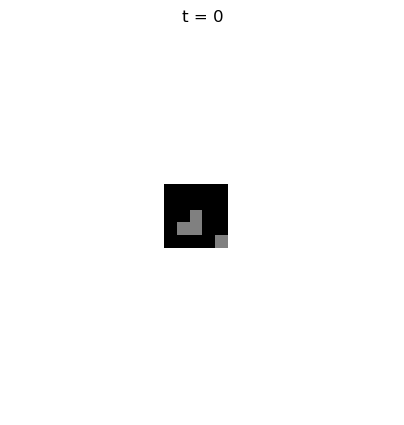

In [198]:
# Srujith's plotting animation methods

# Define custom colors and normalization
cmap = ListedColormap(['white', 'black', 'gray'])
bounds = [0, 1, 6, 13]
norm = BoundaryNorm(bounds, cmap.N)

# Create the figure and axis for animation
fig, ax = plt.subplots(figsize=(5, 5))

# Function to update the plot for each frame
def update(frame):
    ax.clear() # Clear the previous image
    ax.imshow(one_frame(dt[frame]), cmap=cmap, norm=norm, interpolation='none')
    ax.set_title(f't = {frame}')
    ax.axis('off') # Optionally hide axes for a cleaner look

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(dt), interval=200) # 200ms delay
ani.save("SIRS_model.gif", writer = 'Pillow', fps = 3)